In [201]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm
from scipy.signal import find_peaks
import networkx as nx 
import source_file as sf
import importlib
importlib.reload(sf)


import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### The non-Hermitian Quantum walker

$$ H_{tot} = H_{search} + V, $$

where $V = -i\kappa |w \rangle \langle w |$ and $H_{search} = - \gamma N |s\rangle\langle s| - |w\rangle\langle w | $ with $\kappa > 0$.




Question: What is the effect of the non-hermitian part in the search process, and how one can optimize it for the best search process?

There are three eigenvalues approximately

1) $-\gamma N$
2) $-1 - i\kappa$
3) $0 \quad $ $N - 2 \,\,\text{degenerate}$

The exact values are

1) $ \lambda_- = -\frac{\gamma N + 1 + i \kappa}{2}  - \sqrt{\left( \frac{\gamma N + 1 + i \kappa}{2} \right)^2 - (\gamma N - \gamma)(1 + i \kappa)}$
2) $\lambda_+ = -\frac{\gamma N + 1 + i \kappa}{2}  + \sqrt{\left( \frac{\gamma N + 1 + i \kappa}{2} \right)^2 - (\gamma N - \gamma)(1 + i \kappa)}$
3) $0 \quad $ $N - 2 \,\,\text{degenerate}$

The imaginary part will be responsible for the decrease in population from the target site and increase in population of the detector state. We want to fix $\kappa$ and try to optimize $\gamma$ so that there is maximal decrease in population from the target site.

In [214]:
#parameters
N = 1000
gamma =  1
w  = 10
kappa = 0.1

#Hamiltonian matrix
H = sf.H_CG(N,gamma,w,kappa)

#get the eigenvalue and right eigenstates
eigval,_ = np.linalg.eig(H)

#get the eigenvalue and left eigenstates
eigval_2,_ = np.linalg.eig(np.transpose(H))

#theoretical computations of the eigenvalues
lambda_plus,lambda_minus = sf.lambda_pm(N,gamma,kappa)


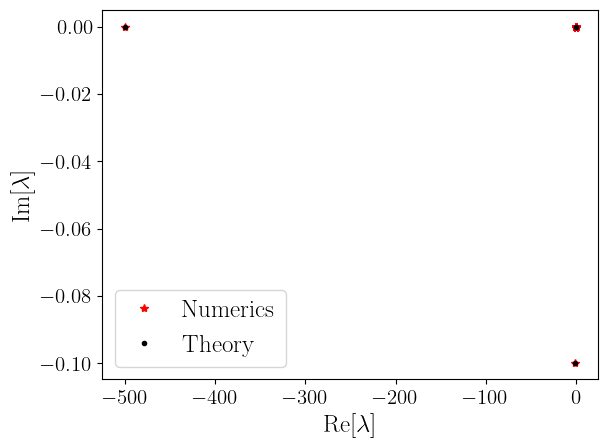

In [34]:
plt.plot(np.real(eigval),np.imag(eigval),'r*',label = 'Numerics')

plt.plot(0,0,'k.')
plt.plot(np.real(lambda_plus),np.imag(lambda_plus),'k.', label = 'Theory')
plt.plot(np.real(lambda_minus),np.imag(lambda_minus),'k.')

plt.legend(frameon = True)

plt.xlabel(r'Re$[\lambda]$')
plt.ylabel(r'Im$[\lambda]$')

plt.show()

Imaginary part of the eigenvalues

In [312]:
#parameters
N = [100,500,1000]
gamma =  1
w  = 10
kappa = np.logspace(-3,1,100)

im_eig0_nm = np.zeros((len(N),len(kappa)))
im_eig1_nm = np.zeros((len(N),len(kappa)))

im_eig0_th = np.zeros((len(N),len(kappa)))
im_eig1_th = np.zeros((len(N),len(kappa)))

for i in tqdm(range(len(N))):
    for j in range(len(kappa)):

        #Hamiltonian matrix
        #H = sf.H_CG(N[i],gamma,w,kappa[j])

        #get the eigenvalues
        #eigval,_ = np.linalg.eig(H)
        
        #sort the eigenvalues
        #sorted_indices = np.argsort(np.real(eigval))  # Get indices for sorting eigenvalues
        #eigval_sorted = eigval[sorted_indices]  # Sort eigenvalues

        #im_eig0_nm[i,j] =  np.imag(eigval_sorted[0])
        #im_eig1_nm[i,j] =  np.imag(eigval_sorted[1])
        
        #theoretical computations of the eigenvalues
        lambda_plus,lambda_minus = sf.lambda_pm(N[i],gamma,kappa[j])
        
        im_eig0_th[i,j] = np.imag(lambda_minus)
        im_eig1_th[i,j] = np.imag(lambda_plus)


100%|██████████| 3/3 [00:00<00:00, 3640.89it/s]


[]

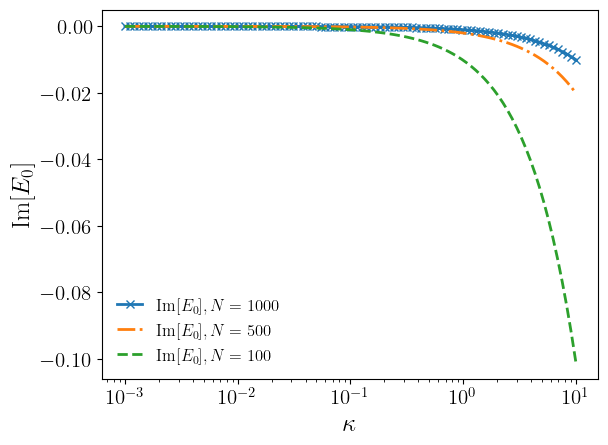

In [295]:
#plt.plot(kappa,np.abs(im_eig0_nm[0]),'x', label = f'Im$[E_0], N = {N[0]}:$NM' )
#plt.plot(kappa,np.abs(im_eig1_nm[0]),'o', label = f'Im$[E_1], N = {N[0]}:$NM' )

#plt.plot(kappa,im_eig0_nm[0],'-x', label = f'Im$[E_0], N = {N[0]}:$NM' )
#plt.plot(kappa,im_eig1_nm[0],'-o', label = f'Im$[E_1], N = {N[0]}:$NM' )

#plt.plot(kappa,im_eig0_nm[2],'-x', label = f'Im$[E_0], N = {N[2]}:$NM' )
#plt.plot(kappa,im_eig1_nm[2],'-x', label = f'Im$[E_1], N = {N[2]}:$NM' )


plt.plot(kappa,im_eig0_th[2],'-x', label = f'Im$[E_0], N = {N[2]}$' )
plt.plot(kappa,im_eig0_th[1],'-.', label = f'Im$[E_0], N = {N[1]}$' )
plt.plot(kappa,im_eig0_th[0],'--', label = f'Im$[E_0], N = {N[0]}$' )

#plt.plot(kappa,im_eig1_th[0],'-.', label = f'Im$[E_1], N = {N[0]}$' )


#plt.plot(kappa,im_eig1_th[2],'-.', label = f'Im$[E_1], N = {N[2]}$' )




plt.legend(fontsize = 12)
plt.ylabel(r'Im$[E_0]$')
plt.xlabel(r'$\kappa$')
plt.xscale('log')
#plt.yscale('log')
plt.plot()

In [306]:
#parameters
N = np.arange(100,1100,50)
gamma =  1
w  = 10
kappa = [0.001,0.01,0.1,1,10]

#im_eig0_nm = np.zeros((len(N),len(kappa)))
#im_eig1_nm = np.zeros((len(N),len(kappa)))

im_eig0_th_N = np.zeros((len(N),len(kappa)))
im_eig1_th_N = np.zeros((len(N),len(kappa)))

for i in tqdm(range(len(N))):
    for j in range(len(kappa)):

        #Hamiltonian matrix
        #H = sf.H_CG(N[i],gamma,w,kappa[j])

        #get the eigenvalues
        #eigval,_ = np.linalg.eig(H)
        
        #sort the eigenvalues
        #sorted_indices = np.argsort(np.real(eigval))  # Get indices for sorting eigenvalues
        #eigval_sorted = eigval[sorted_indices]  # Sort eigenvalues

        #im_eig0_nm[i,j] =  np.imag(eigval_sorted[0])
        #im_eig1_nm[i,j] =  np.imag(eigval_sorted[1])
        
        #theoretical computations of the eigenvalues
        lambda_plus,lambda_minus = sf.lambda_pm(N[i],gamma,kappa[j])
        
        im_eig0_th_N[i,j] = np.imag(lambda_minus)
        im_eig1_th_N[i,j] = np.imag(lambda_plus)


100%|██████████| 20/20 [00:00<00:00, 24781.71it/s]


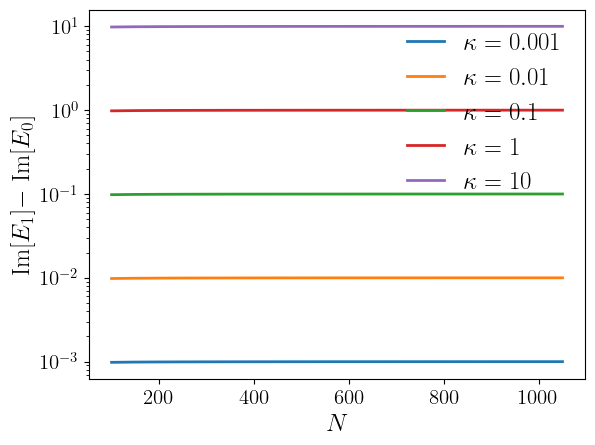

In [310]:
plt.plot(N, np.abs(im_eig0_th_N[:,0] - im_eig1_th_N[:,0] ), label = f'$\kappa ={kappa[0]}$')
plt.plot(N, np.abs(im_eig0_th_N[:,1] - im_eig1_th_N[:,1] ), label = f'$\kappa ={kappa[1]}$')
plt.plot(N, np.abs(im_eig0_th_N[:,2] - im_eig1_th_N[:,2] ), label = f'$\kappa ={kappa[2]}$')
plt.plot(N, np.abs(im_eig0_th_N[:,3] - im_eig1_th_N[:,3] ), label = f'$\kappa ={kappa[3]}$')
plt.plot(N, np.abs(im_eig0_th_N[:,4] - im_eig1_th_N[:,4] ), label = f'$\kappa ={kappa[4]}$')

plt.legend()
plt.ylabel(r'Im$[E_1] -$ Im$[E_0]$')
plt.xlabel(r'$N$')
plt.yscale('log')
plt.show()

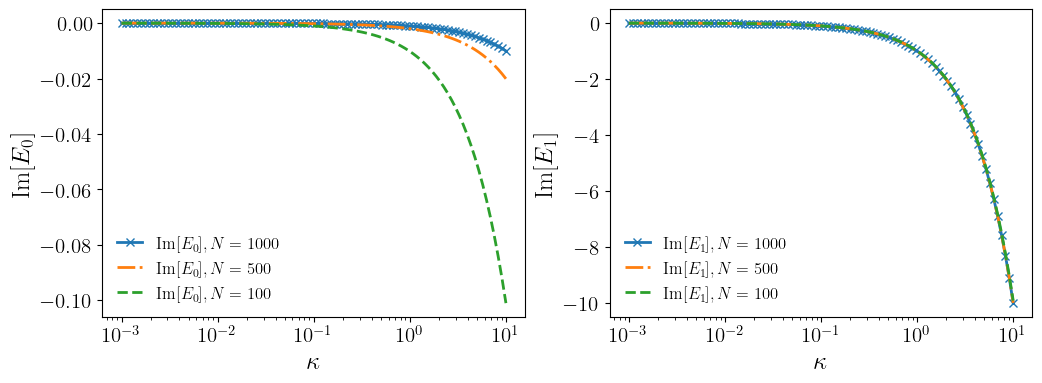

In [314]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(kappa,im_eig0_th[2],'-x', label = f'Im$[E_0], N = {N[2]}$' )
ax[0].plot(kappa,im_eig0_th[1],'-.', label = f'Im$[E_0], N = {N[1]}$' )
ax[0].plot(kappa,im_eig0_th[0],'--', label = f'Im$[E_0], N = {N[0]}$' )
ax[0].legend(fontsize = 12)
ax[0].set_ylabel(r'Im$[E_0]$')
ax[0].set_xlabel(r'$\kappa$')
ax[0].set_xscale('log')


#####################################################


ax[1].plot(kappa,im_eig1_th[2],'-x', label = f'Im$[E_1], N = {N[2]}$' )
ax[1].plot(kappa,im_eig1_th[1],'-.', label = f'Im$[E_1], N = {N[1]}$' )
ax[1].plot(kappa,im_eig1_th[0],'--', label = f'Im$[E_1], N = {N[0]}$' )
ax[1].legend(fontsize = 12)
ax[1].set_ylabel(r'Im$[E_1]$')
ax[1].set_xlabel(r'$\kappa$')
ax[1].set_xscale('log')

plt.savefig(r'../Figures/imaginary_eigenvalues.pdf',bbox_inches = 'tight', dpi = 600)
plt.show()

The overlap of the eigenvectors with the initial state corresponding too these different eigenvalues. Since we may have a different left and right eigenvectors, we consider the quantity

$$\langle E_0^L | s \rangle \langle s | E_0^R \rangle \,\, \text{and}\,\, \langle E_1^L | s \rangle \langle s | E_1^R \rangle$$ 

The eigenvectors for the ground and the first excited states are:

$$|\lambda_\pm \rangle = N_\pm \left(\frac{- \lambda_\pm - \gamma(N -1)}{\gamma \sqrt{N - 1}}, 1\right)^T$$


In [245]:
#parameters
N = 1024
w  = 10
kappa = 0.001
gamma = np.linspace(0.0001,2/N,100)

E0s,E1s,E0w,E1w = sf.overlap_CG_numerics(N,gamma,w,kappa)
E0s_t,E1s_t,E0w_t,E1w_t = sf.overlap_CG_theory(N,gamma,w,kappa)

100%|██████████| 100/100 [00:00<00:00, 40260.17it/s]


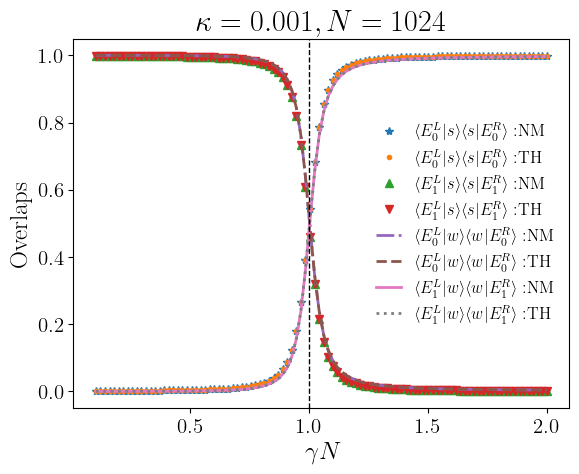

In [246]:
plt.plot(gamma*N, E0s,'*',label = r'$\langle E_0^L | s \rangle \langle s | E_0^R \rangle:$NM')
plt.plot(gamma*N, E0s_t,'.',label = r'$\langle E_0^L | s \rangle \langle s | E_0^R \rangle:$TH')

plt.plot(gamma*N, E1s,'^',label = r'$\langle E_1^L | s \rangle \langle s | E_1^R \rangle:$NM')
plt.plot(gamma*N, E1s_t,'v',label = r'$\langle E_1^L | s \rangle \langle s | E_1^R \rangle:$TH')

plt.plot(gamma*N, E0w,'-.',label = r'$\langle E_0^L | w \rangle \langle w | E_0^R \rangle:$NM')
plt.plot(gamma*N, E0w_t,'--',label = r'$\langle E_0^L | w \rangle \langle w | E_0^R \rangle:$TH')

plt.plot(gamma*N, E1w,'-',label = r'$\langle E_1^L | w \rangle \langle w | E_1^R \rangle:$NM')
plt.plot(gamma*N, E1w_t,':',label = r'$\langle E_1^L | w \rangle \langle w | E_1^R \rangle:$TH')

plt.axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

plt.legend(fontsize = 12)
plt.xlabel(r'$\gamma N$')
plt.ylabel(r'Overlaps')
plt.title(f'$\\kappa = {kappa}, N = {N}$')

plt.savefig(f'../Figures/Overlap_CG/Overlap_k{kappa}_N{N}.pdf',bbox_inches = 'tight',dpi =600)
plt.show()

Calculating the survival probability and the probability of detection of the site $| w \rangle$


$$S(t) =  \langle \psi(t)| \psi(t) \rangle$$



In [263]:
N = 500
w  = 10
kappa = 10
gamma = [0.0002,0.001,0.002,0.003,0.004]

T = 400
dt = 0.01
m  = int(T/dt)

w_prob = np.zeros((len(gamma),m))
s_prob = np.zeros((len(gamma),m))
sn_prob = np.zeros((len(gamma),m))
sf_prob = np.zeros((len(gamma),m))

#target state
ket_w = np.zeros((N,1))
ket_w[w] = 1

for k in tqdm(range(len(gamma))):
    
    #The Hamiltonian
    H =  sf.H_CG(N,gamma[k],w,kappa)

    #initial state
    psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

    #Initial overlap
    #w_prob[k,0] =  (np.abs(np.vdot(ket_w,psi_0))**2) 
    s_prob[k,0] = np.abs(np.vdot(psi_0,psi_0))
    sn_prob[k,0] = (np.abs(np.vdot(ket_w,psi_0))**2) / np.abs(np.vdot(psi_0,psi_0))
    #sf_prob[k,0] = (np.abs(np.vdot(psi_0,psi_0))) * (np.abs(np.vdot(ket_w,psi_0))**2)

    #Time Evolution operator
    ut = np.asarray(ls.expm(-(1.0j)*H*dt))

    for j in range(1,m):        

        #wavefunction after time evolution of dt
        psit = ut.dot(psi_0)    

        # Normalized fidelity and survival probability
        #w_prob[k,j] = (np.abs(np.vdot(ket_w,psit))**2 )
        s_prob[k,j] = np.abs(np.vdot(psit,psit))
        sn_prob[k,j] = (np.abs(np.vdot(ket_w,psit))**2) / np.abs(np.vdot(psit,psit))
        #sf_prob[k,j] = np.abs(np.vdot(psit,psit)) * (np.abs(np.vdot(ket_w,psit))**2)

        psi_0 = psit  

100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


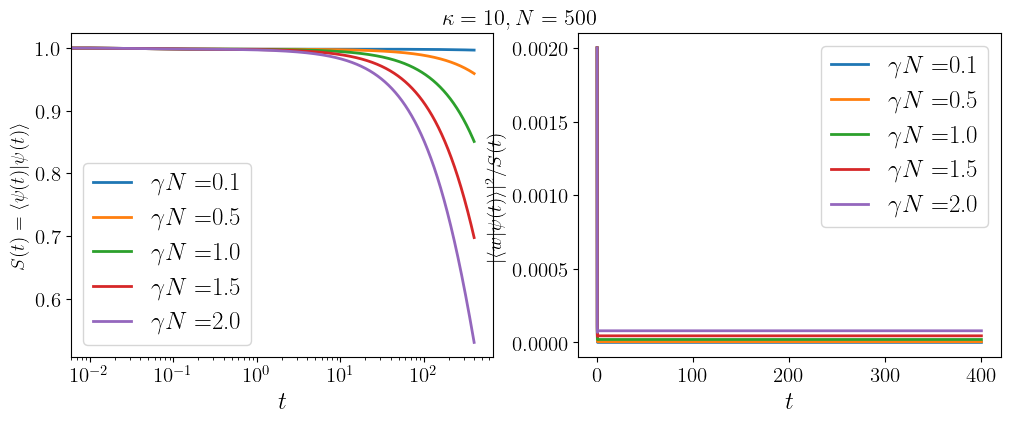

In [264]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 4 columns

##############################
ax[0].plot(np.arange(m)*dt,s_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[0].plot(np.arange(m)*dt,s_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[0].plot(np.arange(m)*dt,s_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[0].plot(np.arange(m)*dt,s_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[0].plot(np.arange(m)*dt,s_prob[4],label = f'$\\gamma N=${gamma[4]*N}')

ax[0].legend(frameon =True,loc = 'lower left')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$S(t) = \langle \psi(t)|\psi(t)\rangle$',fontsize = 14)
ax[0].set_xscale('log')

##############################
ax[1].plot(np.arange(m)*dt,sn_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[1].plot(np.arange(m)*dt,sn_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[1].plot(np.arange(m)*dt,sn_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[1].plot(np.arange(m)*dt,sn_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[1].plot(np.arange(m)*dt,sn_prob[4],label = f'$\\gamma N=${gamma[4]*N}')

ax[1].legend(frameon =True,loc = 'upper right')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$|\langle w|\psi(t)\rangle|^2 / S(t)$', fontsize = 14)

##############################

# Title for the whole figure
fig.suptitle(f'$\\kappa = {kappa}, N = {N}$', fontsize=16)
fig.subplots_adjust(top=0.92)


plt.savefig(f'../Figures/Fidelity_CG_dynamics/presentation_fidelity_dynamics_kappa{kappa}-N{N}.pdf',bbox_inches = 'tight')
plt.show()

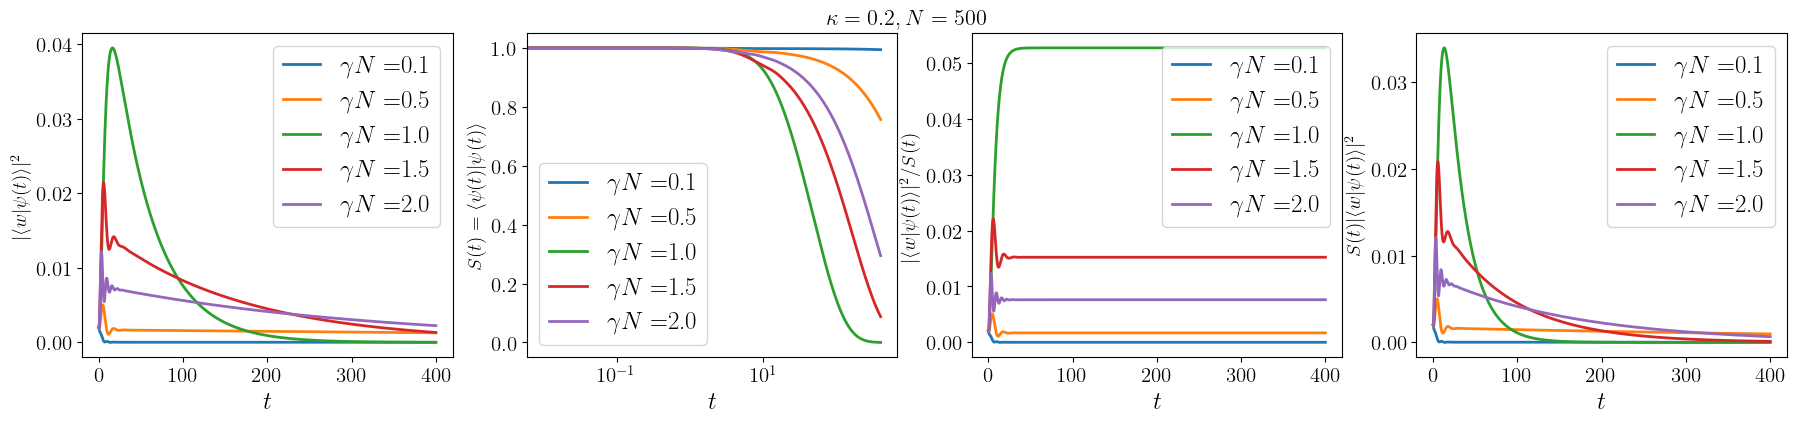

In [156]:
fig, ax = plt.subplots(1, 4, figsize=(22, 4))  # 1 row, 4 columns

ax[0].plot(np.arange(m)*dt,w_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[0].plot(np.arange(m)*dt,w_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[0].plot(np.arange(m)*dt,w_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[0].plot(np.arange(m)*dt,w_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[0].plot(np.arange(m)*dt,w_prob[4],label = f'$\\gamma N=${gamma[4]*N}')

ax[0].legend(frameon =True,loc = 'upper right')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$|\langle w|\psi(t)\rangle|^2$',fontsize = 14)

##############################
ax[1].plot(np.arange(m)*dt,s_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[1].plot(np.arange(m)*dt,s_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[1].plot(np.arange(m)*dt,s_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[1].plot(np.arange(m)*dt,s_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[1].plot(np.arange(m)*dt,s_prob[4],label = f'$\\gamma N=${gamma[4]*N}')


ax[1].legend(frameon =True,loc = 'lower left')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$S(t) = \langle \psi(t)|\psi(t)\rangle$',fontsize = 14)
ax[1].set_xscale('log')

##############################
ax[2].plot(np.arange(m)*dt,sn_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[2].plot(np.arange(m)*dt,sn_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[2].plot(np.arange(m)*dt,sn_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[2].plot(np.arange(m)*dt,sn_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[2].plot(np.arange(m)*dt,sn_prob[4],label = f'$\\gamma N=${gamma[4]*N}')


ax[2].legend(frameon =True,loc = 'upper right')
ax[2].set_xlabel(r'$t$')
ax[2].set_ylabel(r'$|\langle w|\psi(t)\rangle|^2 / S(t)$', fontsize = 14)

##############################
ax[3].plot(np.arange(m)*dt,sf_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
ax[3].plot(np.arange(m)*dt,sf_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
ax[3].plot(np.arange(m)*dt,sf_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
ax[3].plot(np.arange(m)*dt,sf_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
ax[3].plot(np.arange(m)*dt,sf_prob[4],label = f'$\\gamma N=${gamma[4]*N}')


ax[3].legend(frameon =True,loc = 'upper right')
ax[3].set_xlabel(r'$t$')
ax[3].set_ylabel(r'$S(t)|\langle w|\psi(t)\rangle|^2$',fontsize = 14)


# Title for the whole figure
fig.suptitle(f'$\\kappa = {kappa}, N = {N}$', fontsize=16)
fig.subplots_adjust(top=0.92)


plt.savefig(f'../Figures/Fidelity_CG_dynamics/fidelity_dynamics_kappa{kappa}-N{N}.pdf',bbox_inches = 'tight')
plt.show()

Let's calculate the complement of survival probability $1 - S(T)$ at different time instants.

In [168]:
N = 500
w  = 10
kappa = [0.001,0.01,0.1,1,10]
gamma = np.arange(0.0001,0.01,0.0001)

T = 4*(np.pi/2)*np.sqrt(N)
dt = 0.01
m  = int(T/dt)

s_prob = np.zeros((len(gamma),len(kappa),m))


for ii in range(len(kappa)):

    for k in tqdm(range(len(gamma))):
        
        H =  sf.H_CG(N,gamma[k],w,kappa[ii])

        #initial state
        psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

        s_prob[k,0] = np.abs(np.vdot(psi_0,psi_0))

        #Time Evolution operator
        ut = np.asarray(ls.expm(-(1.0j)*H*dt))

        for j in range(1,m):   

            #wavefunction after time evolution of dt
            psit = ut.dot(psi_0)    

            s_prob[k,ii,j] = np.abs(np.vdot(psit,psit))

            psi_0 = psit  

100%|██████████| 99/99 [00:31<00:00,  3.18it/s]


In [173]:
t_opt = (np.pi/2)*np.sqrt(N)
T_check = [t_opt/4,t_opt/2, t_opt, 2*t_opt, 4*t_opt]
dt = 0.01
m_check  = [int(t / dt) for t in T_check]

P_T = np.zeros((len(gamma),len(kappa),len(m_check)))
for i in range(len(gamma)):
    for j in range(len(kappa)):
        for k in range(len(m_check)):
            P_T[i,j,k] = 1 - s_prob[i,j][m_check[k]-1]

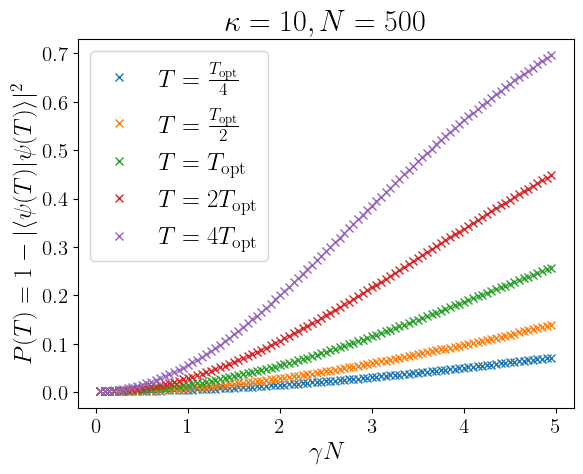

In [189]:
i = 4  #kappa index

plt.plot(gamma*N, P_T[:,i,0],'x',label = r'$T = \frac{T_{\rm{opt}}}{4}$')
plt.plot(gamma*N, P_T[:,i,1],'x',label = r'$T= \frac{T_{\rm opt}}{2}$')
plt.plot(gamma*N, P_T[:,i,2],'x',label = r'$T= T_{\rm opt}$')
plt.plot(gamma*N, P_T[:,i,3],'x',label = r'$T= 2 T_{\rm opt}$')
plt.plot(gamma*N, P_T[:,i,4],'x',label = r'$T= 4 T_{\rm opt}$')
plt.title(f'$\\kappa = {kappa[i]}, N ={N}$')

#plt.axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

plt.legend( frameon = True)
plt.xlabel(r'$\gamma N$')
plt.ylabel(r'$P(T) =  1 - |\langle \psi(T)|\psi(T) \rangle|^2$')
plt.savefig(f'../Figures/Surv_Prob/sprob_complement_kappa{kappa[i]}.pdf',bbox_inches = 'tight')
plt.show()

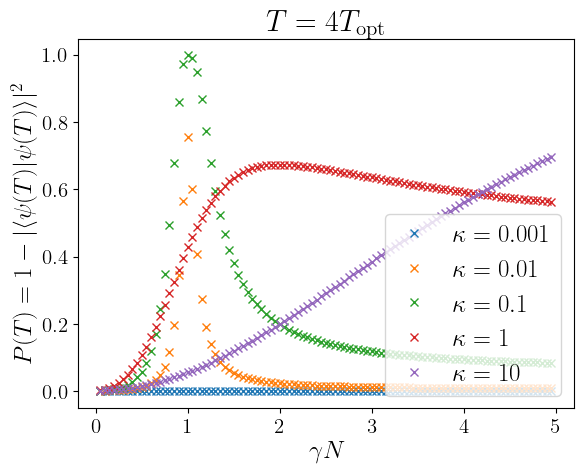

In [198]:
i = 4  #T index

plt.plot(gamma*N, P_T[:,0,i],'x',label = f'$\\kappa={kappa[0]}$')
plt.plot(gamma*N, P_T[:,1,i],'x',label = f'$\\kappa={kappa[1]}$')
plt.plot(gamma*N, P_T[:,2,i],'x',label = f'$\\kappa={kappa[2]}$')
plt.plot(gamma*N, P_T[:,3,i],'x',label = f'$\\kappa={kappa[3]}$')
plt.plot(gamma*N, P_T[:,4,i],'x',label = f'$\\kappa={kappa[4]}$')
#plt.title(r'$T = \frac{T_{\rm{opt}}}{2}$')
plt.title(r'$T = 4 T_{\rm{opt}}$')


#plt.axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

plt.legend(loc = 'lower right', frameon = True)
plt.xlabel(r'$\gamma N$')
plt.ylabel(r'$P(T) =  1 - |\langle \psi(T)|\psi(T) \rangle|^2$')
plt.savefig('../Figures/Surv_Prob/sprob_complement_4Topt.pdf',bbox_inches = 'tight')
plt.show()

There seems a dependence on $\kappa$ on the transition point. Check analytically the overlaps and see whether we can find the transition . 

In the next part, we will compute the quantity fidelity for non-Hermitian Hamiltonian $$S(t) |\langle w|\psi(t)\rangle|^2,$$   with $S(t) =\langle \psi(t)|\psi(t)\rangle $,and compute the time taken to reach the first maximum ($T_{\rm opt}$)  and also the fidelity at the first maximum ($P_{\rm max}$) and see how it varies with $\gamma$ and $\kappa$.

In [226]:
N = 500
w  = 10
kappa = 1.5
gamma = np.arange(0.0001,0.01,0.0001)

T = 400
dt = 0.01
m  = int(T/dt)


P_max = np.zeros(len(gamma))
T_opt = np.zeros(len(gamma))

for k in tqdm(range(len(gamma))):
    
    w_prob = np.zeros(m)

    H =  H_total(N,gamma[k],w,kappa)

    #initial state
    psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

    #target state
    ket_w = np.zeros((N,1))
    ket_w[w] = 1

    w_prob[0] = np.abs(np.vdot(psi_0,psi_0))*np.abs(np.vdot(ket_w,psi_0))**2  

    #Time Evolution operator
    ut = np.asarray(ls.expm(-(1.0j)*H*dt))

    for j in range(1,m):        

        #wavefunction after time evolution of dt
        psit = ut.dot(psi_0)    

        # Normalized fidelity
        w_prob[j] = np.abs(np.vdot(psit,psit))*np.abs(np.vdot(ket_w,psit))**2 

        psi_0 = psit  

    # Find peaks (local maxima)
    #peaks, _ = find_peaks(w_prob)

    # Get the first peak (first maxima)
    #first_maxima = peaks[0] if len(peaks) > 0 else None

    # Output the x and y values of the first maxima
    P_max[k] = np.max(w_prob)
    T_opt[k] = np.arange(m)[np.argmax(w_prob)]*dt


100%|██████████| 99/99 [01:31<00:00,  1.08it/s]


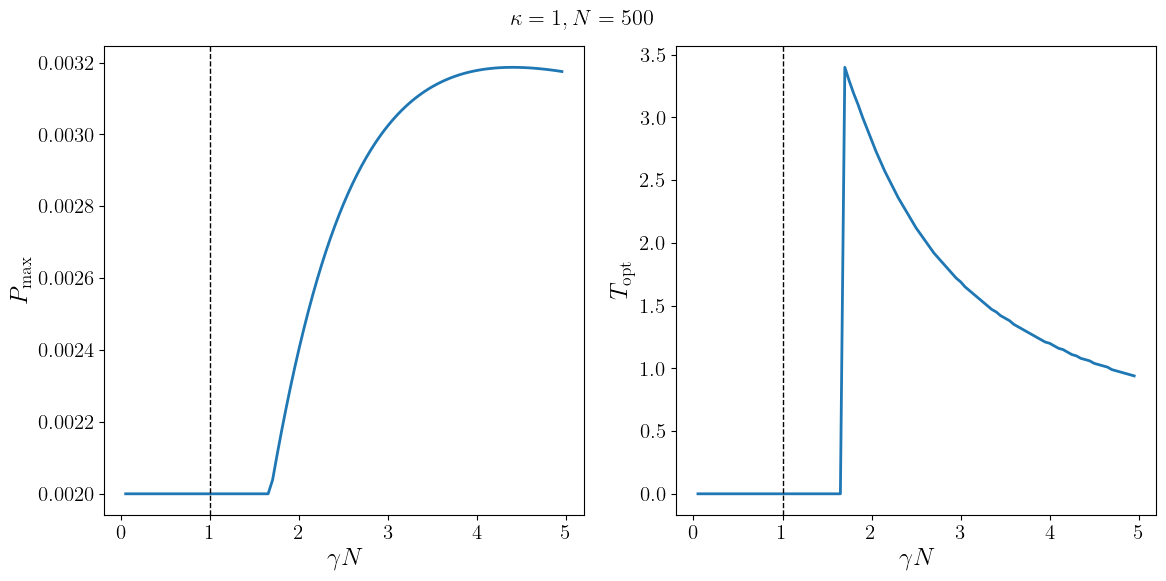

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First plot (P_max vs gamma)
ax[0].plot(gamma*N, P_max)
#ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlabel(r'$\gamma N$')
ax[0].set_ylabel(r'$P_{\rm{max}}$')
ax[0].axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

# Second plot (T_opt vs gamma)
ax[1].plot(gamma*N, T_opt)
ax[1].set_xlabel(r'$\gamma N$')
ax[1].set_ylabel(r'$T_{\rm{opt}}$')
ax[1].axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Title for the whole figure
fig.suptitle(r'$\kappa = 1, N = 500$', fontsize=16)
fig.subplots_adjust(top=0.92)


#save figure
#plt.savefig(r'Fidelity_k1.pdf',bbox_inches = 'tight')

# Show the plots
plt.show()

I saw for $\kappa =  1$,some strange behavior. I wanted to see what's happenning in the fidelity as a function of time for some specific values of $\gamma$.

In [242]:
N = 500
w  = 10
kappa = 1.5
gamma = [0.002,0.003,0.0035,0.01,0.1]

T = 400
dt = 0.01
m  = int(T/dt)

w_prob = np.zeros((len(gamma),m))



#target state
ket_w = np.zeros((N,1))
ket_w[w] = 1


for k in tqdm(range(len(gamma))):
    
    #The Hamiltonian
    H =  H_total(N,gamma[k],w,kappa)

    #initial state
    psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

    #Initial overlap
    w_prob[k,0] = np.abs(np.vdot(psi_0,psi_0))*np.abs(np.vdot(ket_w,psi_0))**2  

    #Time Evolution operator
    ut = np.asarray(ls.expm(-(1.0j)*H*dt))

    for j in range(1,m):        

        #wavefunction after time evolution of dt
        psit = ut.dot(psi_0)    

        # Normalized fidelity
        w_prob[k,j] = np.abs(np.vdot(psit,psit))*np.abs(np.vdot(ket_w,psit))**2 

        psi_0 = psit  


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


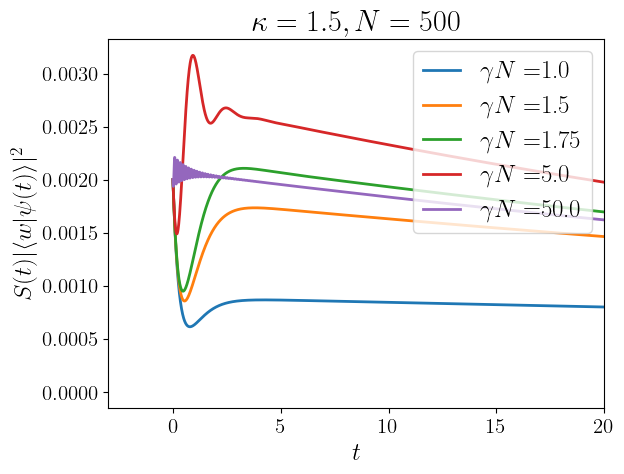

In [243]:
plt.plot(np.arange(m)*dt,w_prob[0],label = f'$\\gamma N=${gamma[0]*500}')
plt.plot(np.arange(m)*dt,w_prob[1],label = f'$\\gamma N=${gamma[1]*500}')
plt.plot(np.arange(m)*dt,w_prob[2],label = f'$\\gamma N=${gamma[2]*500}')
plt.plot(np.arange(m)*dt,w_prob[3],label = f'$\\gamma N=${gamma[3]*500}')
plt.plot(np.arange(m)*dt,w_prob[4],label = f'$\\gamma N=${gamma[4]*500}')
plt.title(r'$\kappa  = 1.5, N = 500$')

plt.xlim(-3,20)
plt.legend(frameon =True,loc = 'upper right')
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t) |\langle w|\psi(t)\rangle|^2$')

#plt.savefig('fidelity_time_kappa0p5-N500.pdf',bbox_inches = 'tight')
plt.show()

In [230]:
1.75/500

0.0035

I define the optimal $\gamma$ as the one for which the normalized fidelity attains the maximum value. I check how it varies with $N$ for different fixed $\kappa$.

In [213]:
N = np.arange(100,1100,100)
w  = 10
T = 400
dt = 0.1
m  = int(T/dt)
kappa = [0.001,0.01,0.1,0.5,1,2]
gamma = np.arange(0,0.1,0.001)


gamma_opt = np.zeros((len(kappa),len(N)))


for l in tqdm(range(len(kappa))):

    for k in range(len(N)):

        #compute the maximum normalized fidelity for different gamma
        w_prob_max =  np.zeros(len(gamma))

        for j in range(len(gamma)):

            w_prob = np.zeros(m)

            H =  H_total(N[k],gamma[j],w,kappa[l])

            #initial state
            psi_0 = (1.0/np.sqrt(N[k]))*np.ones((N[k],1))

            #target state
            ket_w = np.zeros((N[k],1))
            ket_w[w] = 1

            w_prob[0] = np.abs(np.vdot(psi_0,psi_0))*np.abs(np.vdot(ket_w,psi_0))**2  

            #Time Evolution operator
            ut = np.asarray(ls.expm(-(1.0j)*H*dt))

            for i in range(1,m):        

                #wavefunction after time evolution of dt
                psit = ut.dot(psi_0)    

                # Normalized fidelity
                w_prob[i] = np.abs(np.vdot(psit,psit))*np.abs(np.vdot(ket_w,psit))**2 

                psi_0 = psit 

            w_prob_max[j] = np.max(w_prob) 

        #optimal gamma for a fixed N and kappa
        gamma_opt[l,k] = gamma[np.argmax(w_prob_max)]


100%|██████████| 6/6 [34:02<00:00, 340.39s/it]


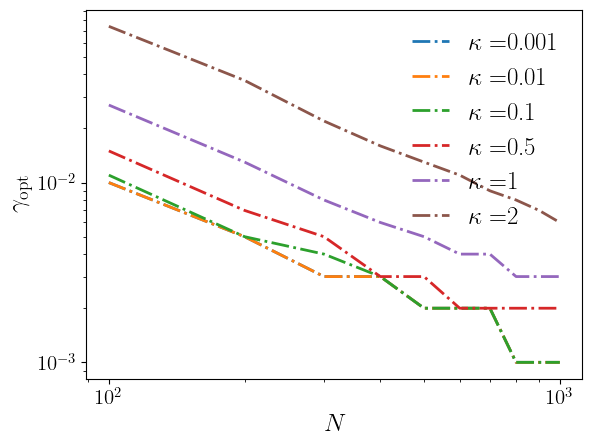

In [222]:
plt.plot(N, gamma_opt[0],'-.',label = f'$\\kappa = ${kappa[0]}')
plt.plot(N, gamma_opt[1],'-.',label = f'$\\kappa = ${kappa[1]}')
plt.plot(N, gamma_opt[2],'-.',label = f'$\\kappa = ${kappa[2]}')
plt.plot(N, gamma_opt[3],'-.',label = f'$\\kappa = ${kappa[3]}')
plt.plot(N, gamma_opt[4],'-.',label = f'$\\kappa = ${kappa[4]}')
plt.plot(N, gamma_opt[5],'-.',label = f'$\\kappa = ${kappa[5]}')

plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$\gamma_{\rm opt}$')
plt.loglog()
plt.show()

Using the optimum $\gamma$ value, we compute the complexity of the algorithm. 

In [220]:
N = np.arange(100,1100,100)
w  = 10
T = 400
dt = 0.1
m  = int(T/dt)
kappa = [0.001,0.01,0.1,0.5,1,2]


t_opt = np.zeros((len(kappa),len(N)))
prob_max = np.zeros((len(kappa),len(N)))


for k in tqdm(range(len(kappa))):

    for l in tqdm(range(len(N))):

        gamma = gamma_opt[k,l]


        w_prob = np.zeros(m)

        H =  H_total(N[l],gamma,w,kappa[k])

        #initial state
        psi_0 = (1.0/np.sqrt(N[l]))*np.ones((N[l],1))

        #target state
        ket_w = np.zeros((N[l],1))
        ket_w[w] = 1

        w_prob[0] = np.abs(np.vdot(psi_0,psi_0))*np.abs(np.vdot(ket_w,psi_0))**2


        #Time Evolution operator
        ut = np.asarray(ls.expm(-(1.0j)*H*dt))

        for j in range(1,m):        

            #wavefunction after time evolution of dt
            psit = ut.dot(psi_0)    

            # Normalized fidelity
            w_prob[j] = np.abs(np.vdot(psit,psit))*np.abs(np.vdot(ket_w,psit))**2 

            psi_0 = psit  


        t_opt[k,l]    = np.arange(m)[np.argmax(w_prob)]*dt
        prob_max[k,l] = np.max(w_prob)

100%|██████████| 6/6 [00:24<00:00,  4.01s/it]


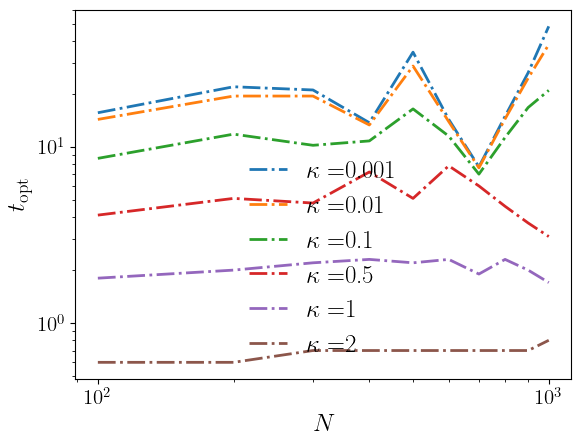

In [224]:
plt.plot(N, t_opt[0],'-.',label = f'$\\kappa = ${kappa[0]}')
plt.plot(N, t_opt[1],'-.',label = f'$\\kappa = ${kappa[1]}')
plt.plot(N, t_opt[2],'-.',label = f'$\\kappa = ${kappa[2]}')
plt.plot(N, t_opt[3],'-.',label = f'$\\kappa = ${kappa[3]}')
plt.plot(N, t_opt[4],'-.',label = f'$\\kappa = ${kappa[4]}')
plt.plot(N, t_opt[5],'-.',label = f'$\\kappa = ${kappa[5]}')

plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$t_{\rm opt}$')
plt.loglog()
plt.show()

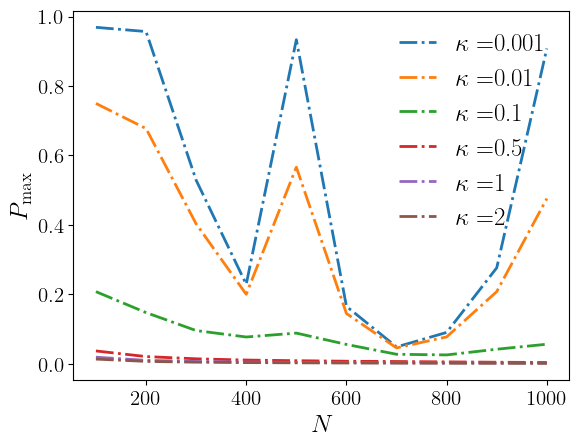

In [223]:
plt.plot(N, prob_max[0],'-.',label = f'$\\kappa = ${kappa[0]}')
plt.plot(N, prob_max[1],'-.',label = f'$\\kappa = ${kappa[1]}')
plt.plot(N, prob_max[2],'-.',label = f'$\\kappa = ${kappa[2]}')
plt.plot(N, prob_max[3],'-.',label = f'$\\kappa = ${kappa[3]}')
plt.plot(N, prob_max[4],'-.',label = f'$\\kappa = ${kappa[4]}')
plt.plot(N, prob_max[5],'-.',label = f'$\\kappa = ${kappa[5]}')

plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$P_{\rm max}$')
plt.show()